<a href="https://colab.research.google.com/github/kokkirala/IRS-/blob/main/Word2Vec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

In [37]:
nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [38]:
model = Word2Vec(sentences=data,vector_size=100, window=5, min_count=1, workers=4)

In [39]:
import string
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

nltk.download("brown")

# Preprocessing data to lowercase all words and remove single punctuation words
document = brown.sents()
data = []
for sent in document:
  new_sent = []
  for word in sent:
    new_word = word.lower()
    if new_word[0] not in string.punctuation:
      new_sent.append(new_word)
  if len(new_sent) > 0:
    data.append(new_sent)

# Creating Word2Vec
model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=1, workers=4)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


In [40]:
# Vector for word love
print("Vector for love:")
print(model.wv["love"])
print()

Vector for love:
[-0.21415642  0.36336505  0.2329789   0.654348   -0.31348217 -0.6067884
  0.27654284  0.8020689  -0.4000746  -0.37332535  0.28142127 -0.68341744
 -0.25532562  0.41912392  0.20085245 -0.62562996  0.6460638  -0.4402092
  0.25957388 -1.1194375   0.6020618   0.6391327   0.4160537   0.05948681
 -0.2739026  -0.3148753  -0.77545446 -0.31016317 -0.8498187  -0.3497595
  0.9878979  -0.18174306  0.5205486  -0.8690365  -0.07118897  0.3247113
  0.5504352  -0.21109498  0.02781072 -0.98154306 -0.39400312 -0.58975565
 -0.8310808   0.17110771  0.43572897  0.1613597  -0.39928517 -0.21011785
  0.2726775  -0.3013951   0.39507508 -0.6869184  -0.06890433 -0.08271081
  0.45260054  0.4353405   0.05359992 -0.3519375  -0.47575012  0.40828204
  0.12018429  0.13003424  0.13305359  0.32161963 -0.6895365   0.11319543
 -0.3517661   0.38868883 -0.28559566  0.50989646 -0.06793728  0.2802337
  0.40370047  0.01771608  0.6009565   0.26176107  0.31344584 -0.35629982
 -0.4785221  -0.28257513 -0.17696775 -0

In [41]:
# Finding most similar words
print("3 words similar to car")
#similar_words = model.wv.most_similar("learning")
words = model.wv.most_similar("car", topn=3)
for word in words:
  print(word)
print()

3 words similar to car
('step', 0.9466516971588135)
('hall', 0.944920003414154)
('hotel', 0.936387300491333)



In [42]:
#Visualizing data
words = ["france", "germany", "india", "truck", "boat", "road", "teacher", "student"]

X = model.wv[words]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

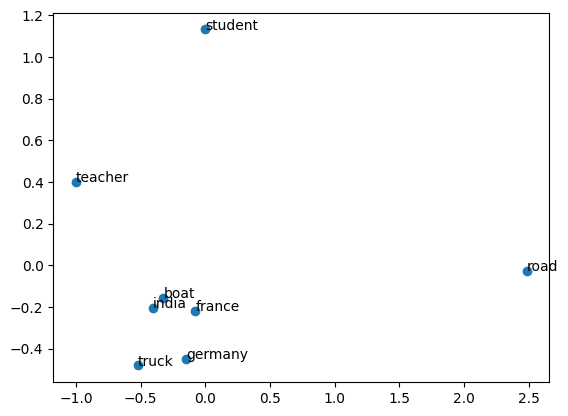

In [43]:
pyplot.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()